# DSCI-552 Homework 1: Vertebral Column Data Set

Name: Trisha Mandal $\quad$ Github Username: trish11953 $\quad$  USC ID: 1449602587

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt

#reference: https://www.codegrepper.com/code-examples/python/change+color+++seaborn+pairplot

## 1. (a) Download the Vertebral Column Data Set

In [2]:
CATEGORY = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", 
         "sacral_slope", "pelvic_radius", "grade_of_spondylolisthesis", "label"]
df = pd.read_csv("../data/vertebral_column_data/column_2C.dat", header=None, delimiter = ' ', names=CATEGORY)
df['label'].replace(['AB','NO'],[1,0],inplace=True)
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


## 1. (b) Pre-processing and Exploratory data analysis:

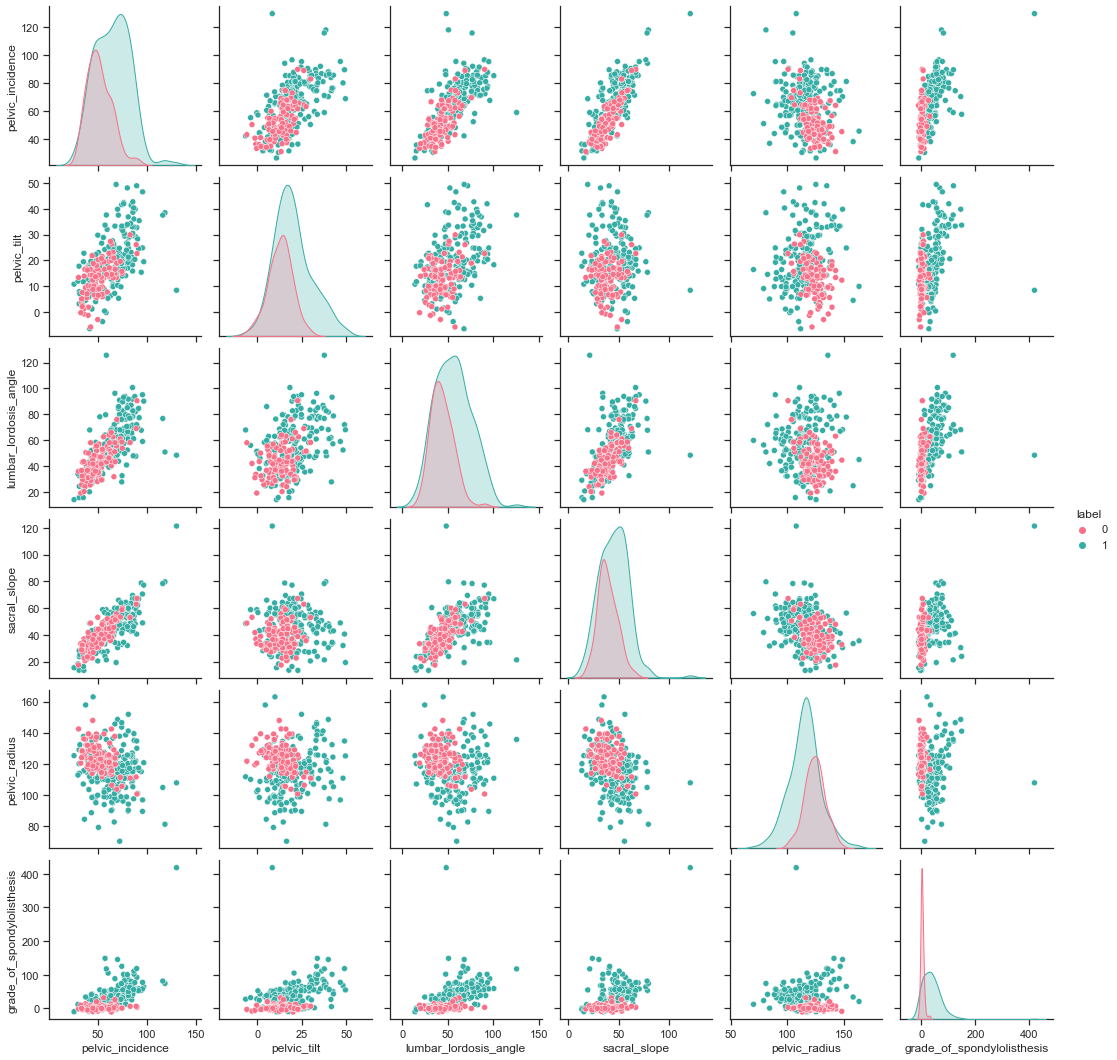

In [3]:
# 1(b)(i) Scatterplots of the independent variables in the dataset.
# Reference: https://medium.com/analytics-vidhya/pairplot-visualization-16325cd725e6
pair_plot = sns.pairplot(df,hue = 'label',diag_kind = "kde",palette = "husl")

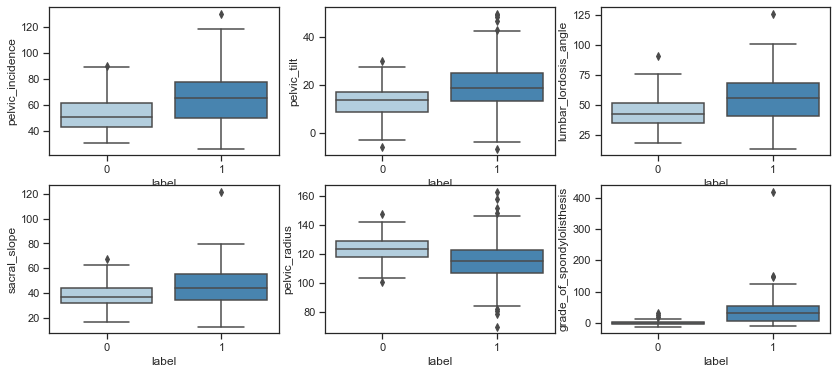

In [4]:
# 1(b)(ii)Box plots for each of the independent variables
# reference: https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
figure, axes = plt.subplots(2, 3, figsize=(14, 6))
for i in range(6):
    sns.boxplot(x="label", y=CATEGORY[i], palette = "Blues", data=df, ax=axes[i // 3, i % 3])
plt.show()

In [5]:
# 1(b)(iii) first 70 of calss 0 and first 140 class 1 as training set
# references: 
#https://pandas.pydata.org/pandas-docs/stable/reference/general_functions.html
#https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
trainingset = pd.concat([df[df["label"] == 0].iloc[0:70, :],df[df["label"] == 1].iloc[0:140, :]],ignore_index=True)

testingset = pd.concat([df[df["label"] == 0].iloc[70:, :],df[df["label"] == 1].iloc[140:, :]], ignore_index=True)

trainingset

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
0,38.51,16.96,35.11,21.54,127.63,7.99,0
1,54.92,18.97,51.60,35.95,125.85,2.00,0
2,44.36,8.95,46.90,35.42,129.22,4.99,0
3,48.32,17.45,48.00,30.87,128.98,-0.91,0
4,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
205,77.12,30.35,77.48,46.77,110.61,82.09,1
206,88.02,39.84,81.77,48.18,116.60,56.77,1
207,83.40,34.31,78.42,49.09,110.47,49.67,1
208,72.05,24.70,79.87,47.35,107.17,56.43,1


## 1.(c) Classification using KNN on Vertebral Column Data Set


In [7]:
# 1(c)(i) k-nearest neighbors with Euclidean metric using software package
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

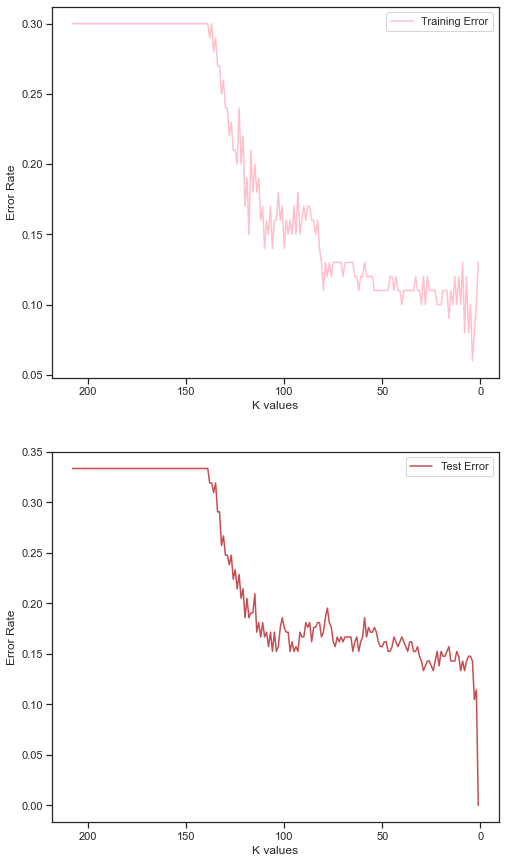

In [8]:
# 1(c)(ii) Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order)
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
xtraining, xtesting = trainingset.drop('label',axis = 1), testingset.drop('label',axis = 1)
ytraining, ytesting = trainingset['label'], testingset['label']
testingerror, trainingerror = [], []
# Calculating error for K values between 1 and 40
for i in range(208, 0, -1):
    classifier = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    classifier.fit(xtraining, ytraining)
    trainingprediction, testingprediction = classifier.predict(xtraining), classifier.predict(xtesting)
    trainingaccuracy = accuracy_score(ytraining,trainingprediction)
    testingaccuracy = accuracy_score(ytesting,testingprediction)
    err = 1- trainingaccuracy 
    testingerror.append(err)
    err2 = 1-testingaccuracy 
    trainingerror.append(err2)
fig, axes = plt.subplots(2, 1, figsize=(8, 15))
kval = range(208, 0, -1)
axes[0].plot(kval, trainingerror, label="Training Error", color="pink")
axes[0].invert_xaxis()
axes[0].set_xlabel("K values")
axes[0].set_ylabel("Error Rate")
axes[0].legend()
axes[1].plot(kval, testingerror, label="Test Error", color="r")
axes[1].invert_xaxis()
axes[1].set_xlabel("K values")
axes[1].set_ylabel("Error Rate")
axes[1].legend()

### k* = 4 is the best k

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100

True positive rate:  0.8333333333333334 
True negative tive rate:  0.9857142857142858 


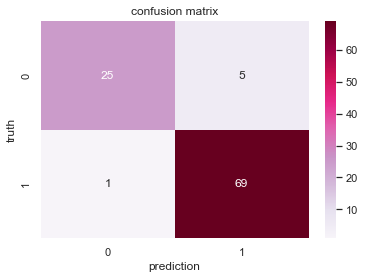

In [9]:
# Calculation of the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.2
# reference: https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
classifier = KNeighborsClassifier(n_neighbors=4,metric='euclidean')
classifier.fit(xtraining, ytraining)
yprediction = classifier.predict(xtesting)
sns.set()
fig, axe = plt.subplots()
cell = confusion_matrix(ytesting, yprediction)
truepositive = cell[0, 0]
falsepositive = cell[1, 0]
truenegative = cell[1, 1]
falsenegative = cell[0, 1]
truepositiverate =  truepositive / (truepositive + falsenegative)
truenegativerate = truenegative / (falsepositive + truenegative)
sns.heatmap(cell,annot=True,ax=axe, cmap='PuRd')
axe.set_xlabel('prediction')
axe.set_ylabel('truth')
axe.set_title('confusion matrix')
print(classification_report(ytesting, yprediction))
print("True positive rate: ", truepositiverate, "")
print("True negative tive rate: ", truenegativerate, "")

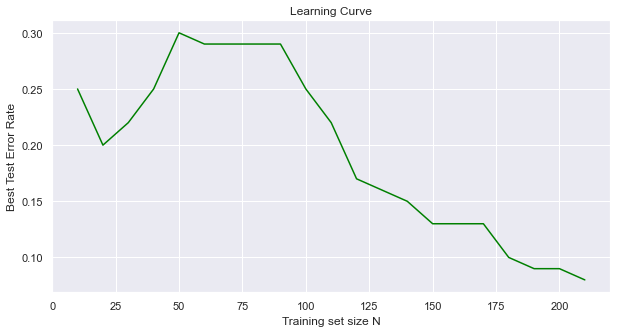

In [10]:
#1.(c)iii Plot learning curve with different traning size n
besterrorvalues = []
for n in range(10, 211, 10):
    label0, label1 = n // 3, n - n // 3
    selectedset = pd.concat([trainingset[trainingset["label"] == 0].iloc[0: label0, :], 
                                    trainingset[trainingset["label"] == 1].iloc[0: label1, :]],
                                    ignore_index=True)
    
    trainingX = selectedset.iloc[:, :-1]
    trainingY = selectedset.iloc[:, -1]
    errors = []
    for k in range(1, n, 5):
        classifier = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
        classifier.fit(trainingX, trainingY)
        testingprediction = classifier.predict(xtesting)
        testingaccuracy = accuracy_score(ytesting,testingprediction)
        errors.append( (1-testingaccuracy) )
    besterrorvalues.append(min(errors))
plt.figure(figsize=(10, 5))
plt.plot(range(10, 211, 10), besterrorvalues, '#008000')
plt.title('Learning Curve')
plt.xlabel('Training set size N')
plt.ylabel('Best Test Error Rate')
plt.show()

## 1.(d) Replace the Euclidean metric with the following metrics and test them

$$
Manhattan(u, v) = Minikowski(u, v, 1) = \sum_{i = 1}^{n}|u_i - v_i|
$$

In [12]:
# 1.(d) - iA: Minikowski distance becomes Manhattan Distance 
# references: 
# https://www.kdnuggets.com/2020/11/most-popular-distance-metrics-knn.html
# https://python-course.eu/machine-learning/k-nearest-neighbor-classifier-with-sklearn.php
# https://numpy.org/doc/stable/reference/generated/numpy.arange.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

testingerror = []
for k in np.arange(1, 197, 5):
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    classifier.fit(xtraining, ytraining)
    testingprediction = classifier.predict(xtesting)
    testingaccuracy = accuracy_score(ytesting,testingprediction)
    err = 1-testingaccuracy
    testingerror.append(err)
tempdict = {}
tempdict['K'] = np.arange(1, 197, 5)
tempdict['Test Error'] = testingerror
df = pd.DataFrame(tempdict)
display(df)

,K,Test Error
0,1,0.12
1,6,0.11
2,11,0.11
3,16,0.12
4,21,0.12
5,26,0.11
6,31,0.12
7,36,0.13
8,41,0.13
9,46,0.13


In [13]:
testingerror = np.array(testingerror)
theK = np.array(np.arange(1, 197, 5))
thoseK = np.where(testingerror == testingerror.min())
theK = theK[thoseK]

Hence, Manhattan Distance has the best performance when k = 26. The error rate is least at this point.

$$
log_{10}(p) \in \{0.1, 0.2, 0.3, ..., 1\} \Rightarrow p \in \{10^{0.1}, 10^{0.2}, ..., 10\} \\
Minikowski(u, v, p) = \left(\sum_{i = 1}^{n}|u_i - v_i|^p\right)^{\frac{1}{p}}
$$

In [14]:
# 1.(d) - iB: Minkowski Distance with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you 
#found for the Manhattan distance in 1(d)iA. What is the best log10(p)?
# reference: https://python-course.eu/machine-learning/k-nearest-neighbor-classifier-with-sklearn.php
P, testingerror = 10**np.arange(0.1,1.1,0.1), {}
for k in theK:
    testingerror[k] = []
    for i in P:
        classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=i)
        classifier.fit(xtraining, ytraining)
        testingprediction = classifier.predict(xtesting)
        testingaccuracy = accuracy_score(ytesting,testingprediction)
        err = 1-testingaccuracy
        testingerror[k].append(err)
        
for k in theK:
    tempdict2 = {}
    tempdict2['log10P'] = P
    tempdict2['Test Error'] = testingerror[k]
    df = pd.DataFrame(tempdict2)
    display(df)

,log10P,Test Error
0,1.258925,0.09
1,1.584893,0.09
2,1.995262,0.08
3,2.511886,0.08
4,3.162278,0.08
5,3.981072,0.06
6,5.011872,0.07
7,6.309573,0.08
8,7.943282,0.09
9,10.000000,0.09


,log10P,Test Error
0,1.258925,0.11
1,1.584893,0.11
2,1.995262,0.12
3,2.511886,0.12
4,3.162278,0.12
5,3.981072,0.12
6,5.011872,0.12
7,6.309573,0.11
8,7.943282,0.11
9,10.000000,0.11


,log10P,Test Error
0,1.258925,0.10
1,1.584893,0.10
2,1.995262,0.11
3,2.511886,0.10
4,3.162278,0.11
5,3.981072,0.10
6,5.011872,0.11
7,6.309573,0.11
8,7.943282,0.11
9,10.000000,0.11


The best log10(p) is 0.6 when k = 6 with lowest test error 0.06

$$
Chebyshev(u, v) = \lim_{p \rightarrow \infty}Minikowski(u, v, p) = \max_{i \in \{1,..., n\}}|u_i - v_i|
$$

In [15]:
# 1.(d) - iB: # Chebyshev Distance with p → ∞ 
import math
testingerror = []

for k in np.arange(1, 197, 5):
    classifier = KNeighborsClassifier(n_neighbors=k, metric='chebyshev', p=math.inf)
    classifier.fit(xtraining, ytraining)
    testingprediction = classifier.predict(xtesting)
    testingaccuracy = accuracy_score(ytesting,testingprediction)
    err = 1-testingaccuracy
    testingerror.append(err)

tempdict3 = {}
tempdict3['K'] = np.arange(1, 197, 5)
tempdict3['Test Error'] = testingerror
df = pd.DataFrame(tempdict3)
display(df)

,K,Test Error
0,1,0.13
1,6,0.10
2,11,0.12
3,16,0.08
4,21,0.11
5,26,0.12
6,31,0.12
7,36,0.10
8,41,0.13
9,46,0.12


Chebyshev Distance has lowest testing error = 0.08 when k = 16

$$
Mahalanobis(u, v) = \sqrt{(u - v)V^{-1}(u - v)^T}
$$
where $V$ is the covariance matrix.


In [16]:
# 1.(d) - ii: Mahalanobis Distance 
testingerror = []
for k in np.arange(1, 197, 5):
    covarience = np.cov(xtraining, rowvar=False)
    classifier = KNeighborsClassifier(n_neighbors=k, algorithm='auto', metric='mahalanobis',metric_params={'VI': np.linalg.pinv(covarience)})
    classifier.fit(xtraining, ytraining)
    testingprediction = classifier.predict(xtesting)
    testingaccuracy = accuracy_score(ytesting,testingprediction)
    err = 1-testingaccuracy
    testingerror.append(err)
tempdict4 = {}
tempdict4['K'] = np.arange(1, 197, 5)
tempdict4['Test Error'] = testingerror
df = pd.DataFrame(tempdict4)
display(df)

,K,Test Error
0,1,0.17
1,6,0.17
2,11,0.20
3,16,0.20
4,21,0.21
5,26,0.20
6,31,0.23
7,36,0.21
8,41,0.24
9,46,0.24


## 1.(e) The majority polling decision replaced by weighted decision

In [17]:
testingerror = []
for k in np.arange(1, 197, 5):
    classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='distance')
    classifier.fit(xtraining, ytraining)
    testingprediction = classifier.predict(xtesting)
    testingaccuracy = accuracy_score(ytesting, testingprediction)
    err = 1-testingaccuracy
    testingerror.append(err)
euclideanmintesterr, euclideankval = min(testingerror), np.arange(1, 197, 5)[np.argmin(testingerror)]
tempdict = {}
tempdict['K'] = np.arange(1, 197, 5)
tempdict['Test Error'] = testingerror
df = pd.DataFrame(tempdict)
display(df)

,K,Test Error
0,1,0.13
1,6,0.10
2,11,0.12
3,16,0.11
4,21,0.11
5,26,0.11
6,31,0.11
7,36,0.11
8,41,0.11
9,46,0.11


In [19]:
testingerror = []
for k in np.arange(1, 197, 5):
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1, weights='distance')
    classifier.fit(xtraining, ytraining)
    testingprediction = classifier.predict(xtesting)
    testingaccuracy = accuracy_score(ytesting,testingprediction)
    err = 1-testingaccuracy
    testingerror.append(err)
manhattanmintesterr, mahattankval = min(testingerror), np.arange(1, 197, 5)[np.argmin(testingerror)]
tempdict2 = {}
tempdict2['K'] = np.arange(1, 197, 5)
tempdict2['Test Error'] = testingerror
df = pd.DataFrame(tempdict2)
display(df)

,K,Test Error
0,1,0.12
1,6,0.11
2,11,0.11
3,16,0.12
4,21,0.11
5,26,0.10
6,31,0.11
7,36,0.11
8,41,0.11
9,46,0.11


In [20]:
import math
testingerror = []
for k in np.arange(1, 197, 5):
    classifier = KNeighborsClassifier(n_neighbors=k, metric='chebyshev', p=math.inf, weights='distance') 
    classifier.fit(xtraining, ytraining)
    testingprediction = classifier.predict(xtesting)
    testingaccuracy = accuracy_score(ytesting,testingprediction)
    err = 1-testingaccuracy
    testingerror.append(err)
chebyshevmintesterr, chebyshevkval = min(testingerror), np.arange(1, 197, 5)[np.argmin(testingerror)]
tempdict3 = {}
tempdict3['K'] = np.arange(1, 197, 5)
tempdict3['Test Error'] = testingerror
df = pd.DataFrame(tempdict3)
display(df)

,K,Test Error
0,1,0.13
1,6,0.13
2,11,0.12
3,16,0.11
4,21,0.12
5,26,0.12
6,31,0.11
7,36,0.11
8,41,0.11
9,46,0.12


In [21]:
weightedpolling = {'Method':['euclidean','manhattan','chebyshev'],
       'K Vaule':[euclideankval, mahattankval,chebyshevkval],
       'Error Rate':[euclideanmintesterr,manhattanmintesterr,chebyshevmintesterr]}
pd.DataFrame(weightedpolling)

,Method,K Vaule,Error Rate
0,euclidean,6,0.10
1,manhattan,26,0.10
2,chebyshev,16,0.11


## 1.(f) The lowest training error rate you achieved in this homework

Ans: The lowest training set error is 0. This happens when k = 1.

All references used in this project:

https://www.codegrepper.com/code-examples/python/change+color+++seaborn+pairplot

https://medium.com/analytics-vidhya/pairplot-visualization-16325cd725e6

https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

https://pandas.pydata.org/pandas-docs/stable/reference/general_functions.html

https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics

https://python-course.eu/machine-learning/k-nearest-neighbor-classifier-with-sklearn.php

https://www.kdnuggets.com/2020/11/most-popular-distance-metrics-knn.html

https://numpy.org/doc/stable/reference/generated/numpy.arange.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

https://python-course.eu/machine-learning/k-nearest-neighbor-classifier-with-sklearn.php

